<a href="https://colab.research.google.com/github/ThaironyDev/Visualizacao_de_dados/blob/main/Data_Science_analise_e_visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Explorando dados

##Analisando notas em geral

In [274]:
import pandas as pd

In [275]:
url = '/content/ratings.csv'

In [276]:
notas = pd.read_csv(url)
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [277]:
notas.shape

(100836, 4)

In [278]:
'''Neste trecho estamos trocando o rótulo do dataframe'''
notas.rename(columns={'userId': 'usuarioId', 'movieId': 'filmeId', 'rating': 'nota', 'timestamp': 'momento'}, inplace=True)
notas.columns

Index(['usuarioId', 'filmeId', 'nota', 'momento'], dtype='object')

In [279]:
import datetime

In [280]:
'''Neste trecho usando o método utcfromtimestamp() convertemos os segundos em um formato de data e formatamos com o strftime()'''
notas['momento'] = notas.momento.apply(lambda x: datetime.datetime.utcfromtimestamp(x))
notas['momento'].dt.strftime('%d/%m/%Y')

0         30/07/2000
1         30/07/2000
2         30/07/2000
3         30/07/2000
4         30/07/2000
             ...    
100831    03/05/2017
100832    03/05/2017
100833    08/05/2017
100834    03/05/2017
100835    03/05/2017
Name: momento, Length: 100836, dtype: object

In [281]:
pd.__version__

'1.5.3'

In [282]:
notas.momento

0        2000-07-30 18:45:03
1        2000-07-30 18:20:47
2        2000-07-30 18:37:04
3        2000-07-30 19:03:35
4        2000-07-30 18:48:51
                 ...        
100831   2017-05-03 21:53:22
100832   2017-05-03 22:21:31
100833   2017-05-08 19:50:47
100834   2017-05-03 21:19:12
100835   2017-05-03 21:20:15
Name: momento, Length: 100836, dtype: datetime64[ns]

In [283]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [284]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [285]:
'''Contando os valores únicos desta serie ordenados por frequência da maior para menor'''
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [286]:
print(f'Média: {notas.nota.mean()}')
print(f'Mediana: {notas.nota.median()}')

Média: 3.501556983616962
Mediana: 3.5


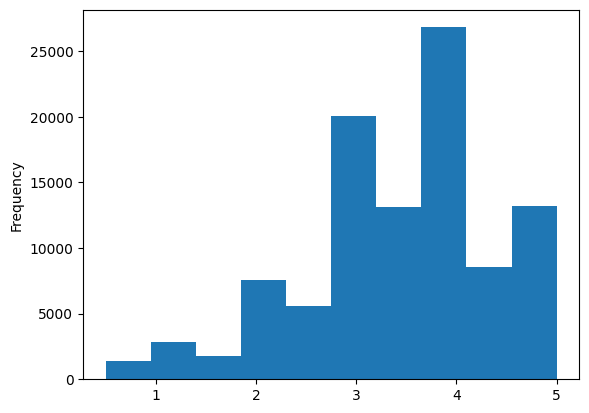

In [287]:
'''Neste trecho estamos plotando um gráfico histograma que representa de maneira visual a frequencia de cada valor da coluna nota'''
notas.nota.plot(kind='hist');

In [288]:
'''Neste trecho estamos explorando as medidas descritivas da coluna nota'''
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [289]:
import seaborn as sns

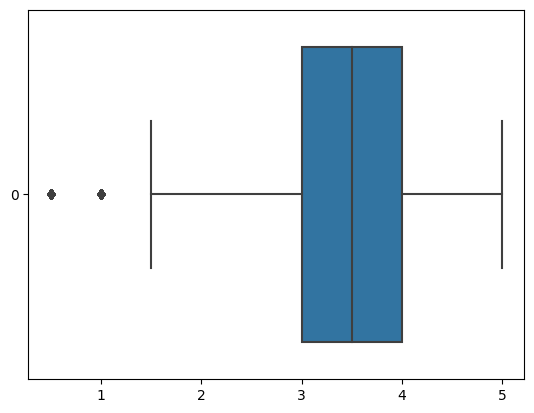

In [290]:
''' Com o método do seaborn boxplot plotamos um gráfico da coluna nota com orientação horizontal'''
sns.boxplot(notas.nota, orient='h');

##Olhando os filmes

In [291]:
filmes = pd.read_csv('/content/movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [292]:
'''Neste trecho estamos alterando o nome de cada coluna com uma lista que contém os novos nomes que devem estar na ordem de alteração
de interesse e submetemos essa lista ao atributo columns'''
filmes.columns = ['filmeId', 'titulo', 'generos']

In [293]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [294]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


##Analisando notas específicas por filme

In [295]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

In [296]:
notas.query('filmeId == 2').nota.mean()

3.4318181818181817

In [297]:
'''Neste trecho estamos agrupando pela coluna filmeId e tirando a media de todos os valores de cada grupo da coluna nota.
OBS: Precisamos ter em mente que quando agrupamos um dataset por uma coluna em específico essa coluna passar a ser o índice deste determinado grupo.'''
medias_por_filme = notas.groupby(['filmeId']).nota.mean().to_frame()

In [298]:
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


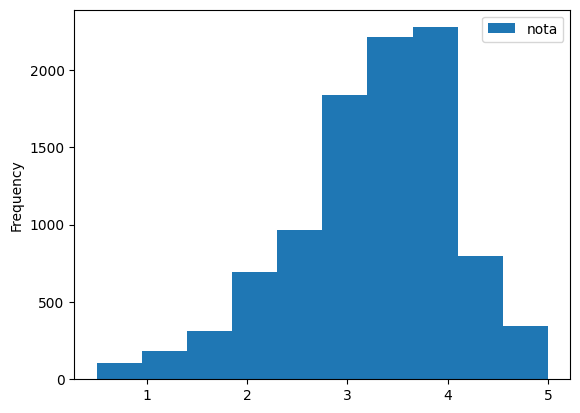

In [299]:
'''Neste trecho estamos plotando um gráfico histograma que representa de maneira visual a frequencia das médias de cada filme tendo em vista que
as notas no eixo x vam de .5 a 5 e no eixo y o filmes que vam de 1 a 193609'''
medias_por_filme.plot(kind='hist');

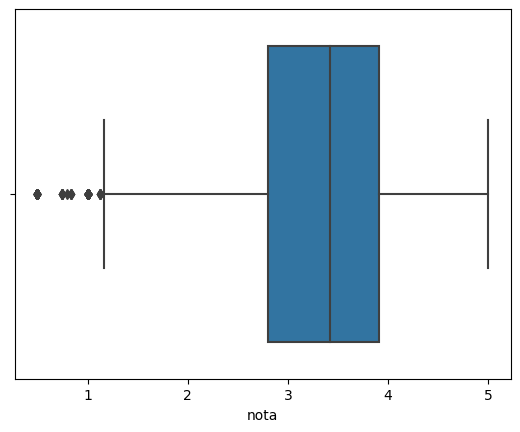

In [300]:
''' Neste trecho podemos ver como acontece a distribuição dos quartis em relação as medias das notas de cada filme'''
sns.boxplot(x=medias_por_filme['nota']);

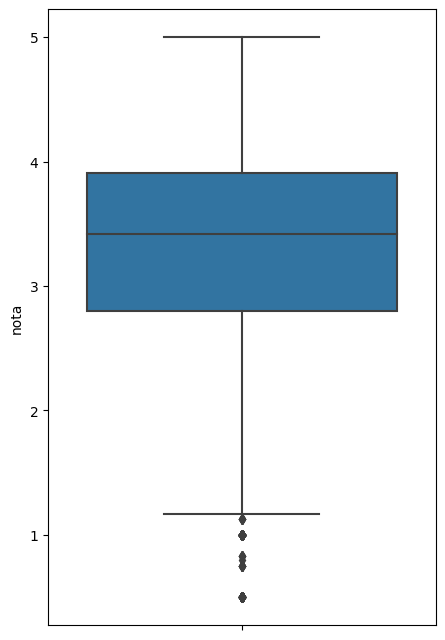

In [301]:
'''Mudando a orientação para vertical usando o eixo y. Podemos também usar o matplotlib para mudar o diametro do gráfico'''
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 8))
sns.boxplot(y=medias_por_filme['nota']);

In [302]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


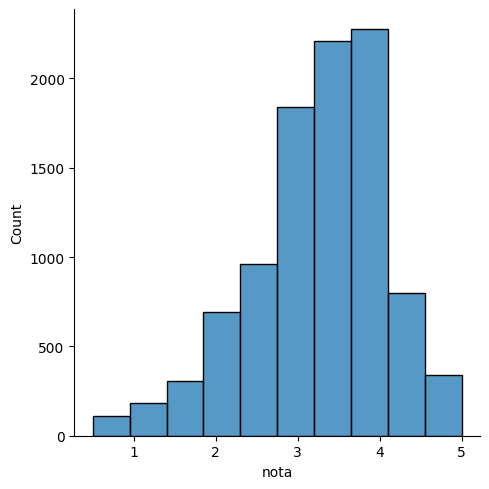

In [303]:
'''Neste trecho estamos plotando um gráfico de distribuição usando o seaborn que representa de maneira visual a frequência das médias de cada filme.
O eixo x representa as notas (variando de .5 a 5), e o eixo y representa a contagem de filmes (numerados de 1 a 193609).
Definimos bins=10 para agrupar as notas de acordo com sua frequência.'''
sns.displot(medias_por_filme['nota'], bins=10);


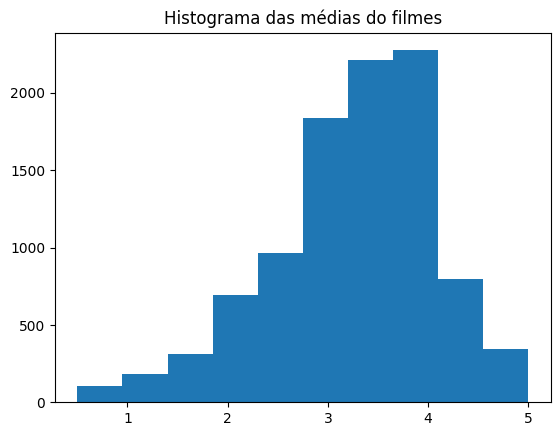

In [304]:
'''Neste trecho estamos plotando um gráfico histograma usando o matplotlib essa é a lib mais baixo nível de todas que nós ja usamos até agora'''
import matplotlib.pyplot as plt
plt.hist(medias_por_filme);
plt.title('Histograma das médias do filmes');

##Variávies

In [305]:
url = 'https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula3.1/tmdb_5000_movies.csv'
tmdb = pd.read_csv(url)
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [306]:
'''Neste trecho estamos verificando as linguas originais da coluna de interesse, essa várial é categórica nominal pois os seus valores
não tem uma ordem de precedência ou hierarquia, já as variáveis categórica ordinal tem uma ordem de precedência como por exemplo os níveis de formação escolar
que pode ser primeiro grau, segundo grau e terceiro grau por isso a variável de exemplo níveis de formação escolar é uma variável categórica ordinal.'''

tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [307]:
'''Neste trecho estamos criando um dataframe com a frequência das linguas mais usadas, redefininco seu índice e renomeando as colunas.'''
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index().rename(columns={'index': 'original_language', 'original_language': 'total'})
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


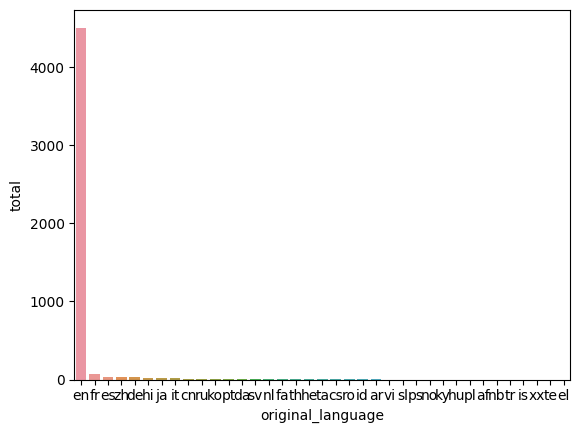

In [308]:
'''Neste trecho estamos usando o método barplot do seaborn para plotar um grafico de barras informado o dataframe par data e os eixos
x para coluna das linguas(original_language) e o y para coluna de frequencia(total) '''
sns.barplot(data = contagem_de_lingua, x='original_language', y='total');

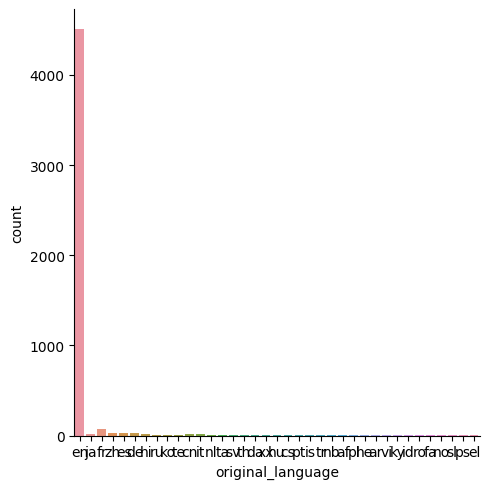

In [309]:
'''Plotando um gráfico baseado em categoria, neste exemplo estamos realizando o mesmo trabalho porém usando apenas o método catplot() do seaborn
passando parâmetros que correspondem a minha necessidade de utilizar um dataframe data, informar a coluna que será utilizada no eixo x coluna e por fim,
qual o tipo de conduta que será tomada com os valores dessa coluna kind "count."'''
sns.catplot(data=tmdb, x='original_language', kind='count');

In [310]:
sns.__version__

'0.12.2'

##Passando uma mensagem através de visualização


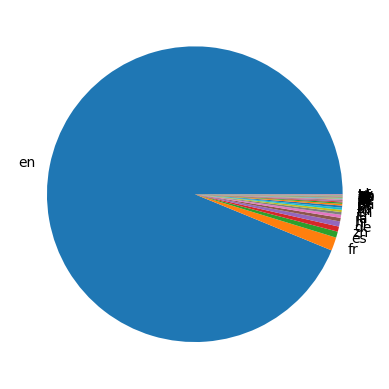

In [311]:
'''Este gráfico de torta não é o mais indicado para este fim pois não permite ver com clareza a proporcionalidade dos conjuntos entre si
'''
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language']);

In [312]:
'''Neste trecho estamos reinterpretando as proporções, separando-as por variáveis.'''
# Na primeira linha, temos a contagem dos valores por tipo de linguagem, que é a somatória dos valores da frequência de cada língua.
total_por_lingua = tmdb['original_language'].value_counts()
# Na segunda linha, somamos todas as frequências para obter o total geral.
total_geral = total_por_lingua.sum()
# Na terceira linha, utilizamos o método loc[linha, coluna] para localizar o índice que tem como valor 'en' (inglês), obtendo assim a proporção para o inglês.
total_de_ingles = total_por_lingua.loc['en']
# Para obtermos os valores correspondentes ao restante das línguas, realizamos uma operação de subtração.
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto, sep='\n')


4505
298


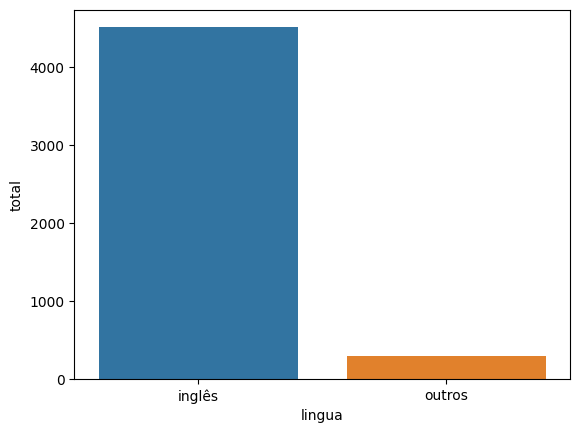

In [313]:
'''Despois de reinterpretar as proporções podemos criar um dicionário que abrangem os valores da nossa pesquisa, criamos um dataframe e plotamos.'''
dados = {
    'lingua': ['inglês', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data=dados);

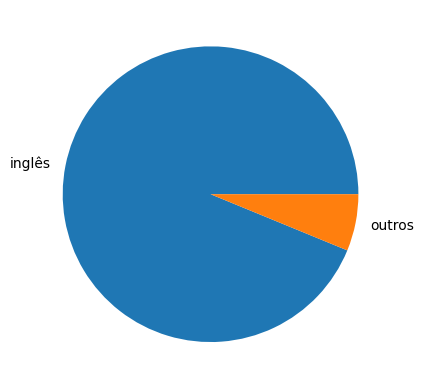

In [314]:
plt.pie(x=dados.total, labels=dados.lingua);

In [315]:
'''
Neste trecho, utilizamos o método query para selecionar todos os registros em que o valor da coluna 'original_language' não é 'en' (inglês).
Em seguida, calculamos a frequência de cada valor na coluna 'original_language' e retornamos uma série com essas contagens.
'''
total_por_lingua_de_outros_filmes = tmdb.query('original_language != "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes.head()

fr    70
es    32
zh    27
de    27
hi    19
Name: original_language, dtype: int64

In [316]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')
filmes_sem_lingua_original_em_ingles.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9


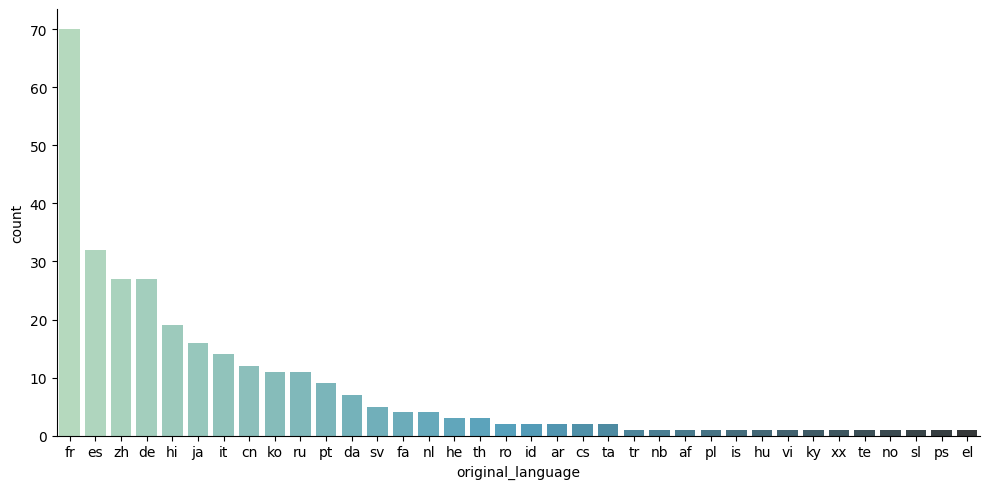

In [317]:
'''Neste trecho, estamos plotando um gráfico usando a biblioteca seaborn para representar a frequência de dados de um DataFrame em 'data'.
Especificamos o eixo x com uma série em 'x', o tipo de gráfico como 'count', a apresentação como retangular ('aspect=2'), a ordem de acordo com o
índice em 'order', e a cor das barras em 'palette="GnBu_d".'''
sns.catplot(data=filmes_sem_lingua_original_em_ingles, x='original_language',
            kind='count',
            aspect=2,
            order=total_por_lingua_de_outros_filmes.index,
            palette="GnBu_d");



In [318]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [319]:
notas_toy_story = notas.query('filmeId == 1')
notas_jumanji = notas.query('filmeId == 2')
print(f'Notas do Toy Story: {notas_toy_story.shape[0]}\nNotas do Jumanji: {notas_jumanji.shape[0]}')


Notas do Toy Story: 215
Notas do Jumanji: 110


In [320]:
print(f'Nota média do Toy Story: {notas_toy_story.nota.mean():.2f}')
print(f'Nota média do Jumanji: {notas_jumanji.nota.mean():.2f}')

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [321]:
print(f'Desvio padrão do Jumanji: {notas_jumanji.nota.std()}')
print(f'Desvio padrão do Toy Story {notas_toy_story.nota.std()}')

Desvio padrão do Jumanji: 0.8817134921476455
Desvio padrão do Toy Story 0.8348591407114047


In [322]:
'''Neste trecho, estamos utilizando o cálculo do desvio padrão para avaliar a dispersão dos nossos dados em relação à média.
 Isso é importante porque, mesmo que tanto no filme1 quanto no filme2 a média seja a mesma, a distribuição das notas é diferente.
  O desvio padrão fornece uma medida quantitativa de quanto essa dispersão ocorre.
De maneira semelhante, ao calcular os quantis, podemos entender como os dados estão distribuídos, e a mediana nos dá uma medida robusta da tendência central.
Aqui, exemplificamos isso com duas séries de dados representando as notas de dois filmes (filme1 e filme2).
Ao imprimir as médias, medianas e os desvios padrão, podemos observar como a dispersão varia entre esses dois conjuntos de dados.'''

import numpy as np
n1 = np.array([2.5] * 10)
n2 = np.array([3.5] * 10)
n3 = np.array([5] * 10)
n4 = np.array([1] * 10)

filme1 = np.append(n1, n2)
filme2 = np.append(n3, n4)
print('Médias'.capitalize())
print(filme1.mean(), filme2.mean(), sep='\n')
print('Medianas'.title())
print(np.median(filme1), np.median(filme2), sep='\n')
print(f'Desvio padrão do filme1: {np.std(filme1)}')
print(f'Desvio padrão do filme2: {np.std(filme2)}')


Médias
3.0
3.0
Medianas
3.0
3.0
Desvio padrão do filme1: 0.5
Desvio padrão do filme2: 2.0


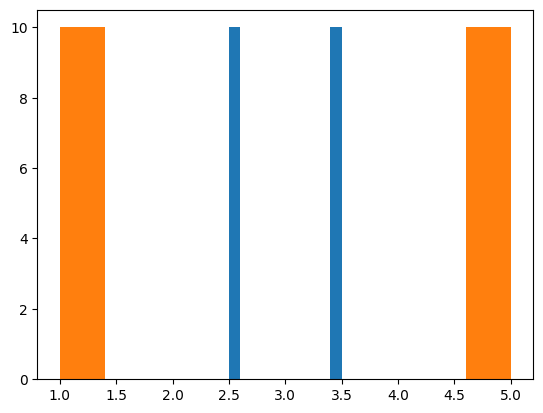

In [323]:
plt.hist(filme1);
plt.hist(filme2);

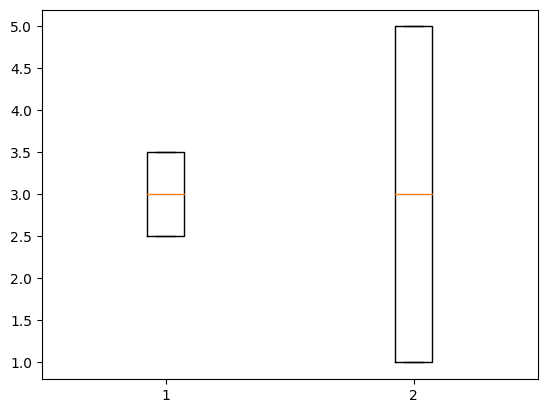

In [324]:
plt.boxplot([filme1, filme2]);

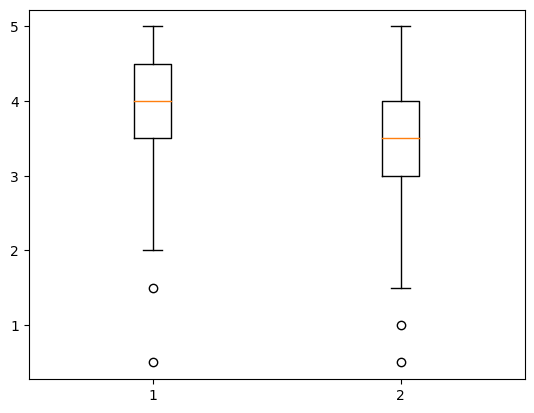

In [325]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota]);

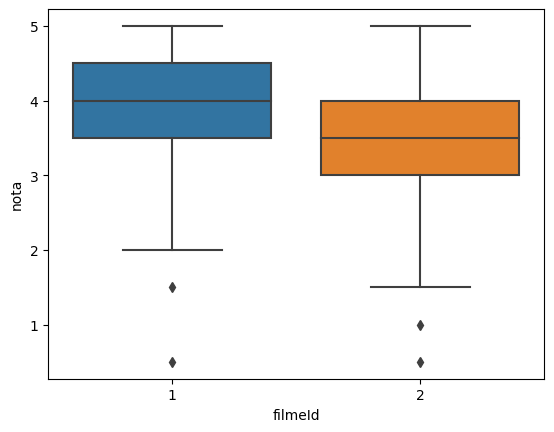

In [326]:
'''O seaborn nos oferece a possibilidade de não apenas passar um dataset, mas também uma expressão que será utilizada para gerar uma visualização.
 Da mesma forma, nos eixos x e y, especificamos as séries que nos interessam, da esquerda para a direita.'''
sns.boxplot(data=notas.query('filmeId in [1, 2]'), x='filmeId', y='nota');
